In [14]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


In [15]:
import numpy as np

x_train = np.expand_dims(x_train.astype(np.float32)/255.,axis=-1)
x_test = np.expand_dims(x_test.astype(np.float32)/255., axis=-1)


In [16]:
def noisify(x,strength=0.8):
  return tf.clip_by_value(x+tf.random.uniform(shape=x.shape)*strength*2-strength,0,1)

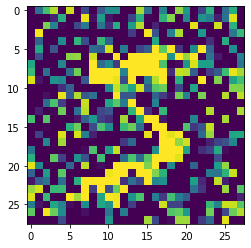

In [21]:
import matplotlib.pyplot as plt 

plt.imshow(noisify(x_train[0],1))

In [20]:
model = keras.models.Sequential([
    keras.layers.Conv2D(10,5,activation='relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(20,5,activation='relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(10,activation='softmax')
])
model.compile('adam','sparse_categorical_crossentropy',['acc'])
model.fit(noisify(x_train,1),y_train,validation_data=(noisify(x_test,1),y_test))

1875/1875 [==============================] - 8s 4ms/step - loss: 0.5689 - acc: 0.8170 - val_loss: 0.3100 - val_acc: 0.9002


In [79]:
matrixj=np.array(
    [
     [1,1,0,1,0,1,0,1,1,0],
     [0,0,1,1,0,0,0,1,0,1],
     [0,1,0,1,0,0,1,0,1,2],
     [0,1,1,0,1,0,1,0,0,3],
     [1,0,0,1,1,0,0,1,0,4],
     [1,1,0,0,1,0,0,1,1,5],
     [0,0,1,0,1,1,0,1,1,6],
     [0,1,1,0,0,1,0,0,0,7],
     [1,1,0,1,1,1,0,1,1,8],
     [1,1,0,1,1,0,1,0,0,9]])

In [80]:
X = matrixj[:,0:-1].astype(np.float32)
Y = matrixj[:,-1]

In [39]:
model = keras.models.Sequential([
    keras.layers.Dense(10,activation='softmax')
])

model.compile('adam','sparse_categorical_crossentropy',['acc'])
hist = model.fit(X,Y,validation_data=(X,Y),epochs=500,verbose=False)
hist.history['acc'][-1], hist.history['val_acc'][-1]

(1.0, 1.0)

In [89]:
import random

def noisify(x,n=4):
  i = random.sample(range(len(x)),n)
  z = x.copy()
  z[i]=1-z[i]
  return z

def prepare_ds(n_copies=1000,n=4):
  Xn = []
  Yn = []
  for _ in range(n_copies):
    for x,y in zip(X,Y):
      Xn.append(noisify(x,n=n))
      Yn.append(y)
  return np.array(Xn), np.array(Yn)

Xn,Yn = prepare_ds()

model = keras.models.Sequential([
        keras.layers.Dense(10,activation='softmax')
])

model.compile('adam','sparse_categorical_crossentropy',['acc'])
hist = model.fit(Xn,Yn,validation_data=(X,Y),epochs=10)
#hist.history['acc'][-1], hist.history['val_acc'][-1]

Epoch 1/10
313/313 [==============================] - 1s 3ms/step - loss: 2.3612 - acc: 0.1081 - val_loss: 2.1165 - val_acc: 0.1000
Epoch 2/10
313/313 [==============================] - 1s 3ms/step - loss: 2.3136 - acc: 0.1100 - val_loss: 1.9899 - val_acc: 0.5000
Epoch 3/10
313/313 [==============================] - 1s 3ms/step - loss: 2.2929 - acc: 0.0980 - val_loss: 1.8883 - val_acc: 0.7000
Epoch 4/10
313/313 [==============================] - 1s 3ms/step - loss: 2.2784 - acc: 0.0841 - val_loss: 1.8042 - val_acc: 0.9000
Epoch 5/10
313/313 [==============================] - 1s 2ms/step - loss: 2.2683 - acc: 0.0681 - val_loss: 1.7382 - val_acc: 0.9000
Epoch 6/10
313/313 [==============================] - 1s 2ms/step - loss: 2.2611 - acc: 0.0543 - val_loss: 1.6824 - val_acc: 0.9000
Epoch 7/10
313/313 [==============================] - 1s 2ms/step - loss: 2.2563 - acc: 0.0433 - val_loss: 1.6404 - val_acc: 0.9000
Epoch 8/10
313/313 [==============================] - 1s 2ms/step - loss: 2.

In [90]:
for i in range(10):
  print(f"{i} -> {model.layers[0].weights[0][:,i]} -> {X[i]}")

0 -> [ 0.22984867 -0.26786786 -0.15504625  0.04584236 -0.3049723   0.01492516
 -0.2513002   0.27016336  0.29366326] -> [1. 1. 0. 1. 0. 1. 0. 1. 1.]
1 -> [-0.05584709 -0.39494175  0.3528543   0.08130182 -0.15626667 -0.3542387
 -0.22420761  0.31884065 -0.06401781] -> [0. 0. 1. 1. 0. 0. 0. 1. 0.]
2 -> [-0.09079249 -0.00889833 -0.07919179  0.07230649 -0.23511127 -0.35195646
  0.40105128 -0.21442273  0.19974671] -> [0. 1. 0. 1. 0. 0. 1. 0. 1.]
3 -> [-0.13710147  0.03547972  0.32406634 -0.39428097  0.1139176  -0.21996059
  0.3442881  -0.30122435 -0.09708562] -> [0. 1. 1. 0. 1. 0. 1. 0. 0.]
4 -> [ 0.28324333 -0.46214283 -0.09361763  0.09195335  0.11741092 -0.22335933
 -0.21843238  0.26730847 -0.10011215] -> [1. 0. 0. 1. 1. 0. 0. 1. 0.]
5 -> [ 0.34900114 -0.14870629 -0.03699692 -0.23522142 -0.00135494 -0.41232935
 -0.1854846   0.26085222  0.34115422] -> [1. 1. 0. 0. 1. 0. 0. 1. 1.]
6 -> [-0.10853485 -0.5219396   0.38136172 -0.36192897 -0.05955411  0.05145346
 -0.19967458  0.26597163  0.4341303

In [91]:
tr_a, val_a = [],[]
for n in range(9):
  Xn,Yn = prepare_ds(n=n)
  model = keras.models.Sequential([
        keras.layers.Dense(10,activation='softmax')])
  model.compile('adam','sparse_categorical_crossentropy',['acc'])
  hist = model.fit(Xn,Yn,validation_data=(X,Y),epochs=10,verbose=False)
  tr_a.append(hist.history['acc'][-1])
  val_a.append(hist.history['val_acc'][-1])
  print(f'n={n}, train acc={tr_a[-1]}, val acc={val_a[-1]}')



n=0, train acc=1.0, val acc=1.0
n=1, train acc=0.9577999711036682, val acc=1.0
n=2, train acc=0.6629999876022339, val acc=1.0
n=3, train acc=0.18520000576972961, val acc=1.0
n=4, train acc=0.03370000049471855, val acc=1.0
n=5, train acc=0.0340999998152256, val acc=0.0
n=6, train acc=0.19189999997615814, val acc=0.0
n=7, train acc=0.6488000154495239, val acc=0.0
n=8, train acc=0.9574999809265137, val acc=0.0


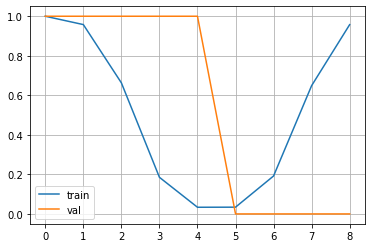

In [92]:
plt.plot(range(9),tr_a,label='train')
plt.plot(range(9),val_a,label='val')
plt.legend()
plt.grid()
plt.show()